In [201]:
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np

In [ ]:
# CROSS CORRELATION -> signal lengths must be same:
# solutions: auto encoder and so o

In [317]:
f = 1024 # sampling frequency
y = np.linspace(0, 2*np.pi, f)
y = np.tile(np.sin(y), 5)
y += np.random.normal(0, 5, y.shape)
y1 = y[f:4*f]
y2 = y[:3*f]

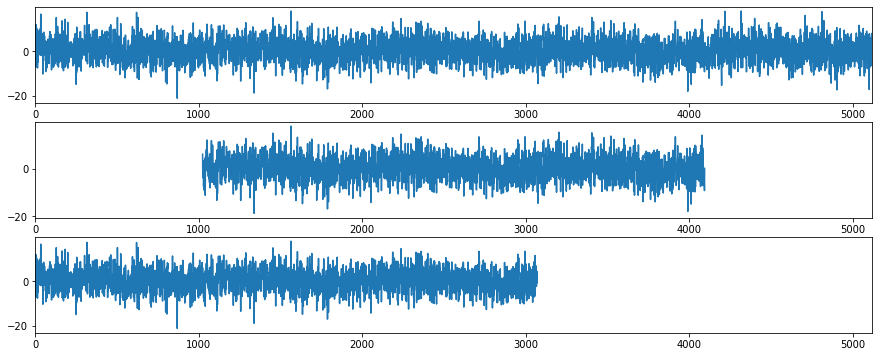

In [319]:
fig, ax = plt.subplots(3, figsize=(15,6))
ax[0].plot(y)
ax[0].set_xlim([0, len(y)])
ax[1].plot(range(f,4*f), y1)
ax[1].set_xlim([0, len(y)])
ax[2].plot(range(0,3*f), y2)
ax[2].set_xlim([0, len(y)])
plt.savefig('lag')
plt.show()

In [322]:
signal.correlate(y1, y2, mode='same')

array([  488.16189842,   294.64864442,  -966.4190237 , ...,
          35.47298404, -1354.48076426, -1455.02714204])

In [323]:
n = len(y1)
corr = signal.correlate(y2, y1, mode='same') / np.sqrt(signal.correlate(y1, y1, mode='same')[int(n/2)] * signal.correlate(y2, y2, mode='same')[int(n/2)])

In [324]:
delay_arr = np.linspace(-0.5*n/f, 0.5*n/f, n)
delay = delay_arr[np.argmax(corr)]

In [325]:
corr

array([-0.00911331, -0.01881545, -0.01751525, ..., -0.01413684,
       -0.01249709,  0.0038102 ])

In [326]:
delay

1.0008140670791272

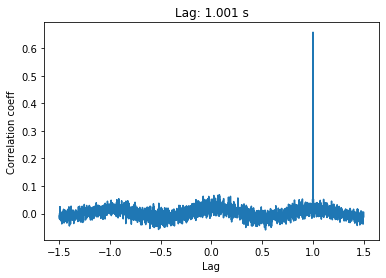

In [327]:
plt.figure()
plt.plot(delay_arr, corr)
plt.title('Lag: ' + str(np.round(delay, 3)) + ' s')
plt.xlabel('Lag')
plt.ylabel('Correlation coeff')
plt.savefig('lag_delay.png')
plt.show()

In [261]:
cros

0.0004883766360617159

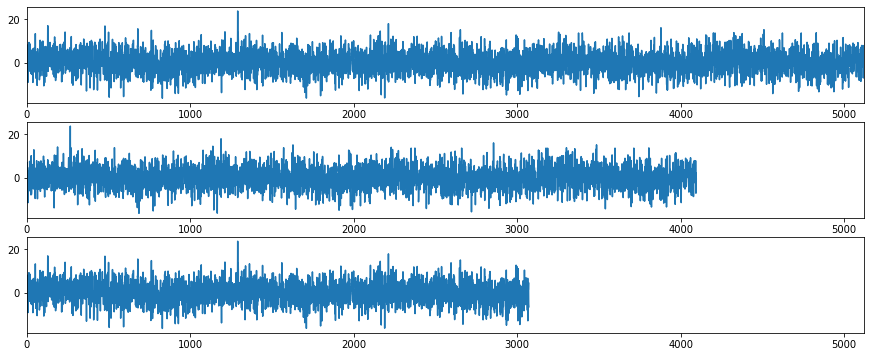

ValueError: x and y must have same first dimension, but have shapes (6143,) and (7167,)

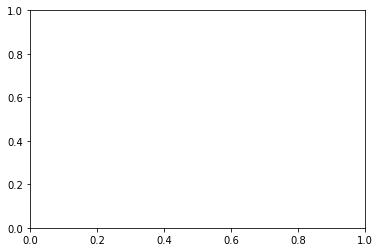

In [304]:
y1 = y.copy()
y1[:f] = 0
y1[4*f:] = 0
y2 = y.copy()
y2[3*f:] = 0

y1 = y[f:5*f]
y2 = y[:3*f]

fig, ax = plt.subplots(3, figsize=(15,6))
ax[0].plot(y)
ax[0].set_xlim([0, len(y)])
ax[1].plot(y1)
ax[1].set_xlim([0, len(y)])
ax[2].plot(y2)
ax[2].set_xlim([0, len(y)])
plt.show()


n = len(y2)
# corr = signal.correlate(y2, y1, mode='full') / np.sqrt(signal.correlate(y1, y1, mode='full')[int(n/2)] * signal.correlate(y2, y2, mode='full')[int(n/2)])
# delay_arr = np.linspace(-0.5*n/f, 0.5*n/f, 2*n-1)
# delay = delay_arr[np.argmax(corr)]

lags = np.arange(-n + 1, n)
ccov = np.correlate(y1 - y1.mean(), y2 - y2.mean(), mode='full')
ccor = ccov / (n * y1.std() * y2.std())

plt.figure()
plt.plot(lags, ccor)
plt.title('Lag: ' + str(np.round(delay, 3)) + ' s')
plt.xlabel('Lag')
plt.ylabel('Correlation coeff')
plt.show()

In [305]:
lags.shape, ccor.shape, y1.shape, y2.shape

((6143,), (7167,), (4096,), (3072,))

In [306]:
4096+3072

7168

In [301]:
lags.shape, ccor.shape, y1.shape, y2.shape

((6143,), (6143,), (3072,), (3072,))

In [300]:
corr.shape

(10239,)

In [272]:
delay_arr.shape

(10239,)

In [273]:
delay_arr.shape, corr.shape

((10239,), (10239,))

In [ ]:
f = 1024 # sampling frequency
y = np.linspace(0, 2*np.pi, f)
y = np.tile(np.sin(y), 5)
y += np.random.normal(0, 5, y.shape)
y1 = y[f:4*f]
y2 = y[:3*f]

In [195]:
f = 100000 # sampling frequency
total_time = 100
t = np.linspace(0, 50*np.pi, f)
y = np.sin(t)

y_delayed = y.copy()
y_delayed[t <= 5*np.pi] = 0
y_delayed[t >= 15*np.pi] = 0

y_delayed2 = y.copy()
y_delayed2[t <= 25*np.pi] = 0
y_delayed2[t >= 35*np.pi] = 0

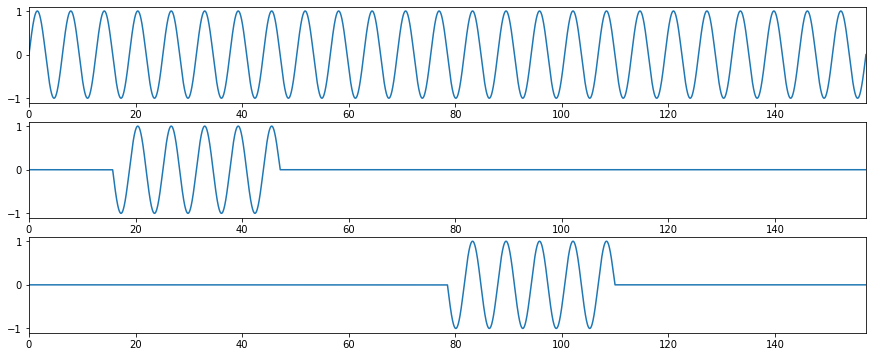

In [196]:
fig, ax = plt.subplots(3, figsize=(15,6))
ax[0].plot(t, y)
ax[0].set_xlim([0, t.max()])
ax[1].plot(t, y_delayed)
ax[1].set_xlim([0, t.max()])
ax[2].plot(t, y_delayed2)
ax[2].set_xlim([0, t.max()])
plt.show()

In [197]:
def find_delay(y1, y2, f):
    n = len(y1)
    corr = signal.correlate(y2, y1, mode='same') / np.sqrt(signal.correlate(y1, y1, mode='same')[int(n/2)] * signal.correlate(y2, y2, mode='same')[int(n/2)])
    delay_arr = np.linspace(-0.5*n/f, 0.5*n/f, n)
    delay = delay_arr[np.argmax(corr)]    
    return delay, delay_arr, corr

In [198]:
delay, delay_arr, corr = find_delay(y_delayed, y_delayed2, f)

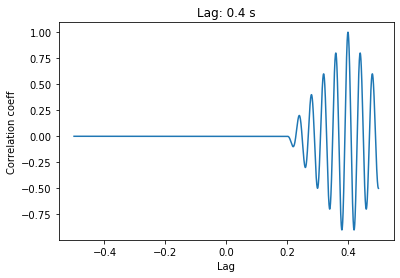

In [199]:
plt.figure()
plt.plot(delay_arr, corr)
plt.title('Lag: ' + str(np.round(delay, 3)) + ' s')
plt.xlabel('Lag')
plt.ylabel('Correlation coeff')
plt.show()

In [310]:
np.pi/8

0.39269908169872414

In [200]:
y1 =  y[(t <= 20*np.pi) & (t > 10*np.pi)]
y2 =  y[(t <= 40*np.pi) & (t > 30*np.pi)]
y1.shape, y2.shape

((20000,), (20000,))

In [159]:
delay, delay_arr, corr = find_delay(y1, y2, f )

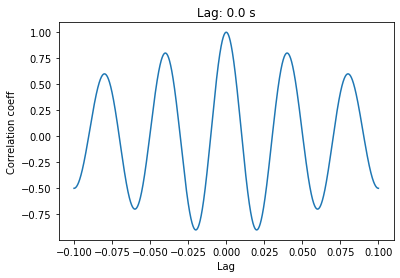

In [160]:
plt.figure()
plt.plot(delay_arr, corr)
plt.title('Lag: ' + str(np.round(delay, 3)) + ' s')
plt.xlabel('Lag')
plt.ylabel('Correlation coeff')
plt.show()